# LSTM(Long Short-Term Memory) 구조

<img src = "./image/rnn_lstm.jpg">

- 단기 기억을 오래 기억하기 위해 고안되었음

<img src = "./image/lstm.png">

- 은닉 상태를 만드는 방법
    - output gate layer(출력 게이트)
        1. 입력과 이전 타임스텝의 은닉 상태를 가중치에 곱한 후 활성화 함수를 통과시켜 다음 은닉상태를 만듦
            - 이 때 기본 순환층과는 달리 시그모이드 활성화 함수를 사용
        2. tanh 활성화 함수를 통과한 값과 곱해져서 은닉 상태를 만듦
        
- LSTM 은 순환 되는 상태가 2개
    - 은닉 상태
    - 셀 상태(cell state)
        - 다음 층으로 전달되지 않고 LSTM 셀에서 순환만 되는 값
        
- 셀 상태를 계산하는 과정
    - forget gate layer(삭제 게이트)
        - 정보를 제거하는 역할
        1. 입력과 은닉 상태를 또 다른 가중치에 곱한 다음 시그모이드 함수를 통과
        2. 이전 타임스텝의 셀 상태와 곱하여 새로운 셀 상태를 만듦
            - 이 셀 상태가 오른쪽에서 tanh 함수를 통과하여 새로운 은닉 상태를 만드는 데 기여
        
    - input gate layer(입력 게이트)
        - 새로운 정보를 셀 상태에 추가
        1. 입력과 은닉 상태를 각기 다른 가중치에 곱함
        2. 하나는 시그모이드 함수, 하나는 tanh 함수를 통과
        3. 두 결과를 곱함
        4. 이전 셀 상태와 더함

## 데이터 준비

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = 500)

In [3]:
# 훈련 세트와 검증 세트로 나누기
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 12)

In [4]:
# 패딩
train_seq = pad_sequences(x_train, maxlen = 100)
val_seq = pad_sequences(x_val, maxlen = 100)

In [ ]:
# LSTM 모델 생성
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 32, input_shape = (100,)))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 8)                   │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,321 (67.66 KB)

 Trainable params: 17,321 (67.66 KB)

 Non-trainable params: 0 (0.00 B)

- LSTM 셀 파라미터 개수
    - ((유닛 수 * 유닛 수) + (입력값의 수 * 유닛 수) + 유닛 수) * 4
        - ((8 * 8) + (32 * 8) + 8) * 4 = 1312

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-lstm-model.keras", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [10]:
history = model.fit(train_seq, y_train, epochs = 100, batch_size = 64, validation_data = (val_seq, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 40ms/step - accuracy: 0.5344 - loss: 0.6923 - val_accuracy: 0.5656 - val_loss: 0.6904
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.5906 - loss: 0.6889 - val_accuracy: 0.5992 - val_loss: 0.6844
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6269 - loss: 0.6803 - val_accuracy: 0.6690 - val_loss: 0.6632
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.6937 - loss: 0.6441 - val_accuracy: 0.7140 - val_loss: 0.6018
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7294 - loss: 0.5896 - val_accuracy: 0.7334 - val_loss: 0.5779
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.7544 - loss: 0.5630 - val_accuracy: 0.7412 - val_loss: 0.5592
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.7692 - loss: 0.5399 - val_accuracy: 0.7640 - val_loss: 0.5342
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.7811 - loss: 0

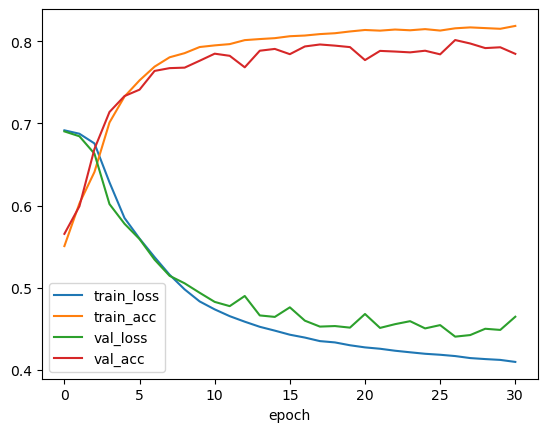

In [11]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 순환층에 드롭아웃 적용

- 순환층은 자체적으로 드롭아웃 기능을 제공
    - SimpleRNN 과 LSTM 클래스 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
        - dropout : 셀의 입력에 드롭아웃을 적용
        - recurrent_dropout : 순환되는 은닉 상태에 드롭아웃을 적용
            - 버전에 따라 recurrent_dropout이 GPU를 사용하지 못하는 경우가 있음

In [12]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 32, input_shape = (100,)))
model2.add(keras.layers.LSTM(8, dropout = 0.3))
model2.add(keras.layers.Dense(1, activation = "sigmoid"))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model2.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-dropout-model.keras", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [14]:
history = model2.fit(train_seq, y_train, epochs = 100, batch_size = 64, validation_data = (val_seq, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 49ms/step - accuracy: 0.5205 - loss: 0.6927 - val_accuracy: 0.5958 - val_loss: 0.6902
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.5859 - loss: 0.6891 - val_accuracy: 0.6566 - val_loss: 0.6828
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 43ms/step - accuracy: 0.6457 - loss: 0.6782 - val_accuracy: 0.6944 - val_loss: 0.6518
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.6942 - loss: 0.6363 - val_accuracy: 0.7040 - val_loss: 0.6013
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.7161 - loss: 0.5909 - val_accuracy: 0.7328 - val_loss: 0.5677
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - accuracy: 0.7386 - loss: 0.5636 - val_accuracy: 0.7518 - val_loss: 0.5470
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step - accuracy: 0.7557 - loss: 0.5431 - val_accuracy: 0.7586 - val_loss: 0.5308
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.7670 - loss: 0

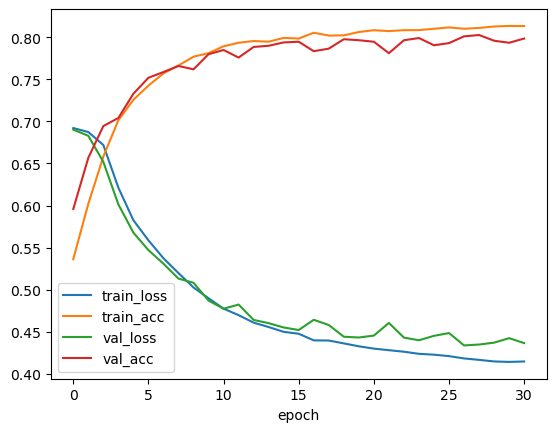

In [15]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# 2개의 층을 연결

- 순환층을 연결할 때의 주의점
    - 순환 층의 은닉 상태는 샘플의 마지막 타임스텝에 대한 은닉 상태만 다음 층으로 전달
        - 순환층을 쌓게 되면 모든 순환층에 순차 데이터가 필요함
        - 앞쪽의 순환층이 모든 타임스텝에 대한 은닉 상태를 출력해야함
            - return_sequences 매개변수를 True로 지정

In [3]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 32, input_shape = (100,)))
model3.add(keras.layers.LSTM(8, dropout = 0.3, return_sequences = True))
model3.add(keras.layers.LSTM(8, dropout = 0.3))
model3.add(keras.layers.Dense(1, activation = "sigmoid"))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [4]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100, 8)              │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 8)                   │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,865 (69.79 KB)

 Trainable params: 17,865 (69.79 KB)

 Non-trainable params: 0 (0.00 B)

- 첫 번째 LSTM
    - 모든 타임스텝(100개) 의 은닉 상태를 출력하기 때문에 출력의 크기가 (None, 100, 8)
- 두 번째 LSTM
    - 마지막 타임스텝의 은닉 상태만 출력하기 때문에 출력의 크기가 (None, 8)

In [5]:
((32 * 8) + (8 * 8) + 8) * 4

1312

In [6]:
((8 * 8) + (8 * 8) + 8) * 4

544

In [7]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model3.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-2rnn-model.keras", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [12]:
history = model3.fit(train_seq, y_train, epochs = 100, batch_size = 64, validation_data = (val_seq, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 81ms/step - accuracy: 0.5008 - loss: 0.6931 - val_accuracy: 0.5846 - val_loss: 0.6906
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 84ms/step - accuracy: 0.5707 - loss: 0.6895 - val_accuracy: 0.6336 - val_loss: 0.6783
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.6327 - loss: 0.6683 - val_accuracy: 0.6812 - val_loss: 0.6177
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.6972 - loss: 0.6034 - val_accuracy: 0.7266 - val_loss: 0.5701
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 80ms/step - accuracy: 0.7282 - loss: 0.5614 - val_accuracy: 0.7452 - val_loss: 0.5376
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.7512 - loss: 0.5286 - val_accuracy: 0.7492 - val_loss: 0.5188
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - accuracy: 0.7619 - loss: 0.5083 - val_accuracy: 0.7648 - val_loss: 0.5026
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.7647 - loss: 0

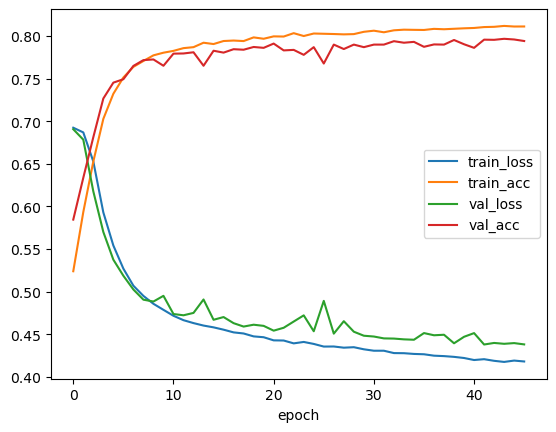

In [13]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

## GRU(Grated Recurrent Unit) 구조

<img src = "./image/rnn_lstm_gru.png">

- LSTM을 간소화한 버전
- LSTM처럼 셀 상태를 계산하지 않고 은닉 상태 하나만 포함
- LSTM보다 가중치가 적기 때문에 계산량이 적지만 성능은 LSTM과 유사함
    - 데이터 양이 적을 때는 GRU의 성능이 더 좋고 데이터 양이 많을 때는 LSTM의 성능이 더 좋아지는 경향이 있음
    - GRu와 LSTM 중 어떤 것이 더 낫다 라고 말할 수는 없음

<img src = "./image/gru.png">

- GRu 셀에는 은닉 상태와 입력에 가중치를 곱하고 절편을 더하는 작은 셀 3개가 들어 있음
    - 2개는 시그모이드 활성화 함수를 사용하고 하나는 tanh 활성화 함수를 사용
    
- reset_gate
    - 셀의 출력이 은닉 상태에 바로 곱해져서 삭제 게이트 역할을 수행
    
- update_gate
    - 어떤 정보를 얼마만큼 유지하고 어떤 정보를 추가할지 결정하는 역할

In [5]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 32, input_shape = (100,)))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation = "sigmoid"))

C:\Users\sungj\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:81: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 32)             │          16,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru (GRU)                            │ (None, 8)                   │           1,008 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,017 (66.47 KB)

 Trainable params: 17,017 (66.47 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
((32 * 8) + (8 * 8) + 8 + 8)* 3

1008

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate = 1e-4)
model4.compile(optimizer = rmsprop, loss = "binary_crossentropy", metrics = ["accuracy"])
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-gru-model.keras", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 4, restore_best_weights = True)

In [10]:
history = model4.fit(train_seq, y_train, epochs = 100, batch_size = 64, validation_data = (val_seq, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.5197 - loss: 0.6927 - val_accuracy: 0.5352 - val_loss: 0.6918
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.5511 - loss: 0.6913 - val_accuracy: 0.5520 - val_loss: 0.6903
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5647 - loss: 0.6894 - val_accuracy: 0.5646 - val_loss: 0.6880
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.5746 - loss: 0.6866 - val_accuracy: 0.5726 - val_loss: 0.6846
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.5791 - loss: 0.6827 - val_accuracy: 0.5880 - val_loss: 0.6796
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.5873 - loss: 0.6766 - val_accuracy: 0.5948 - val_loss: 0.6726
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 45ms/step - accuracy: 0.5998 - loss: 0.6684 - val_accuracy: 0.6122 - val_loss: 0.6627
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 47ms/step - accuracy: 0.6230 - loss: 0

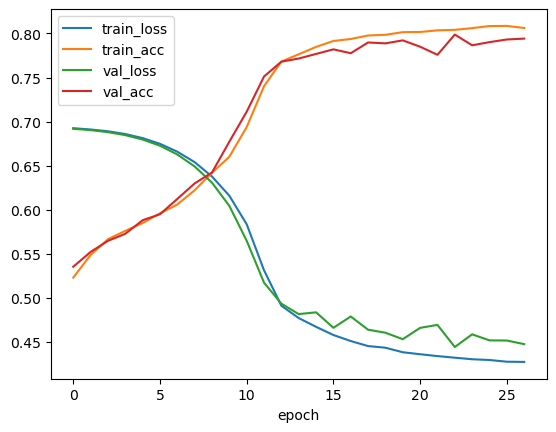

In [11]:
plt.figure()

plt.plot(history.history["loss"], label = "train_loss")
plt.plot(history.history["accuracy"], label = "train_acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend()
plt.xlabel("epoch")
plt.show()

# best model 검증

In [13]:
test_seq = pad_sequences(x_test, maxlen = 100)
rnn_model = keras.models.load_model("./model/best-dropout-model.keras")
rnn_model.evaluate(test_seq, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.8049 - loss: 0.4294


[0.4302962124347687, 0.8022000193595886]